# 전처리

In [123]:
colors = ["black", "silver","rosybrown","brown","red","chocolate","darkorange","tan",
        "darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen",
"forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" ,"black", "silver","rosybrown","brown","red","chocolate","darkorange","tan",
        "darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen",
"forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan",
        "darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen",
"forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan",
        "darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen",
"forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan",
        "darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen",
"forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan",
        "darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen",
"forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan",
        "darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen",
"forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan",
        "darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen",
"forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate"]

print(len(colors))

190


In [124]:
import numpy as np
import csv
#csv는 엑셀과 달리 , 를 통해 데이터를 구분
def distance(x,y):
    dist = np.linalg.norm(np.array(x)- np.array(y))
    return dist 
# np.linalg.norm -> L2 norm 벡터 p,q의 직선 거리 
# (x^2 + y^2)^(1/2)


#given cities
cities = []
#solution
path= []


# 2. get TSP city map

In [125]:
with open('TSP.csv', mode = 'r', newline='') as tsp:
    #마찬가지로 읽기 방식으로 TSP.csv를 가져온다 -> 0행에는 x좌표 1행에는 y 좌표가 들어 있음
    
    #read TSP city map
    reader = csv.reader(tsp)
    for row in reader: # -> 가로 축으로 읽으므로 각 열 별로[x,y] 형태로 들어가게 된다
        cities.append(row)
print('cities 에 들어간 원소의 개수 :',len(cities))
print(cities[:10])

import numpy as np
cities =np_cities = np.array(cities).astype('float64')


cities 에 들어간 원소의 개수 : 1000
[['53.25009344431329', '22.444885209100597'], ['21.570928175048255', '17.44707561216037'], ['72.16107675668404', '85.88179688723211'], ['52.59628100814437', '68.0997652916171'], ['99.55503411642916', '89.03868014012214'], ['45.263493711035', '24.433107718919345'], ['51.65884282004931', '90.10642634366273'], ['89.7286579150431', '69.21655768344208'], ['39.00003159887097', '80.55196125207841'], ['35.59526184197473', '14.05610647225216']]


In [126]:
################################################ 
k = 30  #클러스터의 개수를 미리 지정(20~30)#
################################################


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = k)
y_pred = kmeans.fit_predict(cities)
print("y_pred의 개수 : ",len(y_pred))
print(y_pred[:50])

x_cen =[]
y_cen=[]
for i in range (0,10):
    x_cen.append(kmeans.cluster_centers_[i][0])
    y_cen.append(kmeans.cluster_centers_[i][1])
x_cen[:3]

y_pred의 개수 :  1000
[11  4  5 10 20 27 16 12 28 15  0 29 15  5 29 29 27 19 26 19  3 12 19 28
 21 24  9 24  1 15 25 12 13  4 25 21 21  8  4 23 15  7  7  0  7 28 18  9
 23 25]


[72.10138559378582, 25.350841204022636, 67.33102774271502]

In [127]:
index_cluster_ele = []
index_total = []

for n in range (0,k):
    index_cluster_ele.append([])


for idx in range (0,1000):
        index_cluster_ele[y_pred[idx]].append(int(idx))
           

len(index_cluster_ele)

30

In [128]:
print(index_cluster_ele[:2])

[[10, 43, 87, 116, 133, 143, 145, 174, 178, 188, 217, 223, 233, 235, 252, 257, 272, 281, 392, 426, 432, 487, 527, 539, 567, 575, 596, 598, 632, 637, 710, 739, 742, 763, 804, 827, 870, 923], [28, 65, 94, 130, 134, 192, 193, 278, 280, 291, 368, 389, 393, 416, 448, 541, 546, 585, 600, 602, 628, 669, 702, 712, 740, 744, 756, 768, 780, 863, 877, 898, 988]]


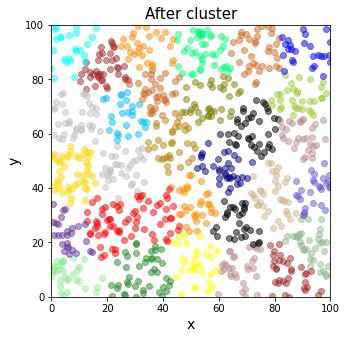

In [129]:
# To plot pretty figures
%matplotlib inline
#import matplotlib as mpl
import matplotlib.pyplot as plt
    
plt.figure(figsize=(5, 5)) #그래프의 크기조절

plt.title("After cluster", fontsize = 15) #그래프의 제목설정
plt.xlabel("x", fontsize=14) #x축 라벨설정
plt.ylabel("y", fontsize=14) #y축 라벨설정

plt.xlim([0,100]) # x축 범위설정
plt.ylim([0,100]) # y축 범위설정


for cluster_index in range (0,k):
    for m in index_cluster_ele[cluster_index]:
        plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c=colors[cluster_index])

#c = 'b,g,r,c,y,m,k,w'  -> color
plt.show()


In [130]:
kmeans.cluster_centers_[:6]

array([[72.10138559, 61.60010225],
       [25.3508412 , 47.1663565 ],
       [67.33102774, 10.41251931],
       [18.83802059, 84.01966444],
       [20.00434725, 26.11010994],
       [73.82539268, 90.39015088]])

In [131]:
NUMBER_OF_CLUSTER = len(kmeans.cluster_centers_)
temp_cen_dis = []
cen_dis = []
temp=100
i=0
for j in range(0,NUMBER_OF_CLUSTER):
    if i==j: #예외처리
        pass
    else:
        if(temp >= distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[j])):
            index_min_distance = j
            temp = distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[j])
            temp_cen_dis.append(j)
        else:
            pass
cen_dis.append(max(temp_cen_dis))
        

In [132]:
cen_dis

[25]

In [133]:
x_cen =[]
y_cen=[]
for i in range (0,len( kmeans.cluster_centers_)):
    x_cen.append(kmeans.cluster_centers_[i][0])
    y_cen.append(kmeans.cluster_centers_[i][1])
x_cen[:5]

[72.10138559378582,
 25.350841204022636,
 67.33102774271502,
 18.838020589620054,
 20.00434724513145]

In [134]:
from collections import deque
center_path = deque([])
center_path

deque([])

In [135]:
start_node_num = cen_dis[0]

from collections import deque
center_path = deque([])
center_path

target_cluster = kmeans.cluster_centers_ #이따가 클러스터 내부도 하기 위해서 center들 모임도 cluster 취급

In [136]:
from collections import deque
center_path = deque([])
target_cluster = kmeans.cluster_centers_ #이따가 클러스터 내부도 하기 위해서 center들 모임도 cluster 취급
start_node_num = cen_dis[0]

#target_cluster = 조사할 cluster
#current_node_num = #현재까지 온 마지막 node의 번호
#path 지금까지의 경로

def cen_greedy_path(target_cluster, start_node_num, path):
    
    for i in range(0,len(target_cluster)):
        
        if len(path)==0: #처음 집어 넣는 거
            path.append(start_node_num)
        else:
            current_node_num = path.pop() #제일 마지막에 넣은거 꺼내서 current_node_num 에 저장
            #print(current_node_num)
            path.append(current_node_num) #path 는 그대로 있어야지
    
            min_distance = 10000 #아무리 멀어도 10000보다는 작음
    
             #current node는 가장 최근에 넣은 node
            for node_num in range(0,len(target_cluster)): # 0~ 클러스터 개수 - 1 까지 
                if (current_node_num == node_num): #자기 자신은 예외처리
                    pass
                else:
                    if node_num in path:
                        pass
                    else:
                        if(min_distance >= distance(target_cluster[current_node_num],target_cluster[node_num])):
                            next_node_num = node_num
                            min_distance = distance(target_cluster[current_node_num],target_cluster[node_num])
                            #print(min_distance)
                        else:
                            pass
        
            path.append(next_node_num) #갱신
       
    
    
    return path

cen_path = cen_greedy_path(target_cluster,start_node_num,center_path)
print(center_path)
len(center_path)

deque([25, 12, 20, 5, 16, 10, 0, 19, 6, 27, 4, 22, 14, 15, 11, 2, 23, 7, 21, 13, 26, 8, 28, 18, 24, 9, 1, 3, 17, 29])


30

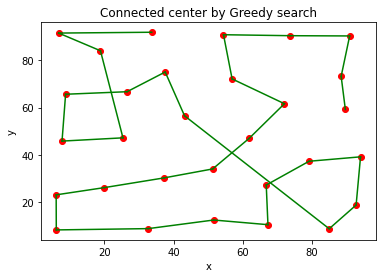

In [138]:
target_cluster = center_path

plt.scatter(x_cen,y_cen,c='r',alpha= 1) # cluster의 center를 빨강으로 표시
plt.title("Connected center by Greedy search")
plt.xlabel("x")
plt.ylabel("y")

x = []
y = []

for i in range (0,len(target_cluster)):
    x.append(float(kmeans.cluster_centers_[center_path[i]][0]))
    y.append(float(kmeans.cluster_centers_[center_path[i]][1]))

for i in range (0,len(target_cluster)-1): #(두개씩묶으므로)
    x_el = [x[i],x[i+1]]
    y_el = [y[i],y[i+1]]
    plt.plot(x_el,y_el,c="g")

    

plt.show()  #-> 그래프를 출력

In [139]:
#overloading
def greedy_path(target_cluster, start_node_num, path,target_cluster_idx):
  
    next_node_num = 777777777777 #이거 들어가면 오류뜨게 하려고
    
    for i in  target_cluster_idx:
        
        if len(path)==0: #처음 집어 넣는 거
            path.append(start_node_num)
        else:
            current_node_num = path.pop() #제일 마지막에 넣은거 꺼내서 current_node_num 에 저장
            #print(current_node_num)
            path.append(current_node_num) #path 는 그대로 있어야지
            
            min_distance = 10000 #아무리 멀어도 10000보다는 작음
            
             #current node는 가장 최근에 넣은 node
            for node_num in target_cluster_idx: # 0~ 클러스터 개수 - 1 까지 
                if (current_node_num == node_num): #자기 자신은 예외처리
                    pass
                else:
                    if node_num in path:
                        pass
                    else:
                        if(min_distance >= distance(target_cluster[current_node_num],target_cluster[node_num])):
                            next_node_num = node_num
                            min_distance = distance(target_cluster[current_node_num],target_cluster[node_num])
                            #print(min_distance)
                        else:
                            pass
            
            path.append(next_node_num) #갱신
       
    
    
    return path

In [145]:
print(cen_path)

deque([25, 12, 20, 5, 16, 10, 0, 19, 6, 27, 4, 22, 14, 15, 11, 2, 23, 7, 21, 13, 26, 8, 28, 18, 24, 9, 1, 3, 17, 29])


In [155]:
np_cities = np.array(cities).astype('float64')
target_cluster = np_cities

path =[]
count = 0

for number_of_cluster in cen_path: #0~ 까지 위의 루트대로 
    
    temp_pos = [i for i, x in enumerate(y_pred) if x == number_of_cluster] #각 cluster의 index 가 저장돤다
    if(count ==0):
        print(temp_pos)
        count = count+1

    #greedy_path(target_cluster, start_node_num, path)
    #target_cluster = 조사할 cluster
    #current_node_num = #현재까지 온 마지막 node의 번호
    #path 지금까지의 경로

    start_node_num = temp_pos[0] #클러스터 내부의 시작점
    cluster_number = number_of_cluster
    start_node = kmeans.cluster_centers_[cluster_number] #오차가 무시할 정도

    path = greedy_path(target_cluster, start_node_num, path,temp_pos)
    #print(path)
    
print(len(path),len(target_cluster))

[30, 34, 49, 54, 88, 95, 175, 240, 242, 292, 314, 326, 329, 374, 378, 441, 459, 485, 587, 589, 612, 729, 733, 858, 869, 871, 885, 908, 910, 977]
1000 1000


In [156]:
print(path )# 7777777777 없으면 된다

[30, 869, 54, 240, 587, 378, 459, 977, 910, 175, 858, 871, 34, 374, 329, 733, 908, 49, 88, 729, 95, 612, 314, 326, 292, 885, 441, 485, 242, 589, 635, 524, 917, 7, 31, 21, 458, 457, 256, 490, 867, 859, 239, 990, 203, 954, 169, 119, 253, 630, 834, 390, 267, 909, 907, 720, 901, 434, 544, 516, 760, 56, 689, 323, 886, 352, 131, 717, 918, 306, 225, 207, 888, 404, 723, 277, 258, 284, 327, 4, 562, 414, 343, 700, 245, 271, 823, 950, 673, 581, 127, 887, 73, 52, 294, 957, 920, 286, 730, 2, 569, 285, 184, 868, 348, 13, 499, 753, 624, 96, 97, 358, 572, 61, 150, 495, 771, 357, 672, 76, 196, 201, 382, 354, 980, 406, 342, 956, 141, 659, 617, 658, 866, 828, 367, 921, 890, 848, 590, 293, 476, 664, 645, 301, 515, 6, 269, 170, 402, 337, 332, 444, 931, 484, 171, 606, 168, 480, 486, 694, 50, 231, 230, 468, 439, 737, 879, 840, 968, 812, 222, 398, 142, 782, 767, 844, 160, 897, 121, 547, 112, 671, 492, 955, 208, 429, 976, 387, 500, 3, 79, 308, 545, 156, 132, 653, 942, 822, 108, 981, 261, 824, 185, 233, 632, 21

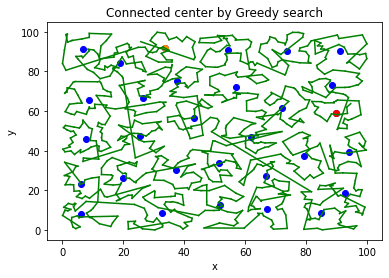

In [162]:
plt.scatter(x_cen,y_cen,c='b',alpha= 1) # cluster의 center를 빨강으로 표시
plt.scatter(x_cen[cen_path[0]],y_cen[cen_path[0]],c='r',alpha= 1)
plt.scatter(x_cen[cen_path[len(cen_path)-1]],y_cen[len(cen_path)-1],c='darkorange',alpha= 1)

plt.title("Connected center by Greedy search")
plt.xlabel("x")
plt.ylabel("y")

x = []
y = []

for i in range (0,len(target_cluster)):
    x.append(float(target_cluster[path[i]][0]))
    y.append(float(target_cluster[path[i]][1]))

for i in range (0,len(target_cluster)-1): #(두개씩묶으므로)
    x_el = [x[i],x[i+1]]
    y_el = [y[i],y[i+1]]
    plt.plot(x_el,y_el,c="g")

    

plt.show()  #-> 그래프를 출력

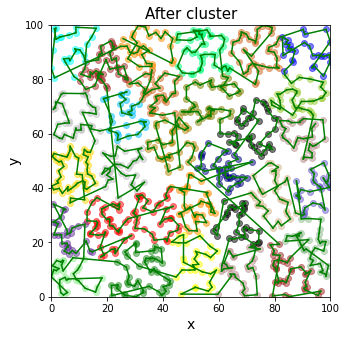

In [163]:
# To plot pretty figures
%matplotlib inline
#import matplotlib as mpl
import matplotlib.pyplot as plt
    
plt.figure(figsize=(5, 5)) #그래프의 크기조절

plt.title("After cluster", fontsize = 15) #그래프의 제목설정
plt.xlabel("x", fontsize=14) #x축 라벨설정
plt.ylabel("y", fontsize=14) #y축 라벨설정

plt.xlim([0,100]) # x축 범위설정
plt.ylim([0,100]) # y축 범위설정


for cluster_index in range (0,k):
    for m in index_cluster_ele[cluster_index]:
        plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c=colors[cluster_index])
        
        
x = []
y = []

for i in range (0,len(target_cluster)):
    x.append(float(target_cluster[path[i]][0]))
    y.append(float(target_cluster[path[i]][1]))

for i in range (0,len(target_cluster)-1): #(두개씩묶으므로)
    x_el = [x[i],x[i+1]]
    y_el = [y[i],y[i+1]]
    plt.plot(x_el,y_el,c="g")

plt.show()
        
    

#c = 'b,g,r,c,y,m,k,w'  -> color

In [173]:
path[:5]

[30, 869, 54, 240, 587]

In [175]:
print(distance(np_cities[path[10]],np_cities[path[11]]))

2.7977516135230602


In [171]:
def cal_cost(my_path):
    dist = 0
    for idx in range (0,len(my_path)):
        if (idx == len(my_path)-1):
            pass #path의 맨끝에는 생략
        else:
            dist = dist + distance(np_cities[my_path[idx]],np_cities[my_path[idx+1]])
    dist = dist + distance(np_cities[my_path[0]],np_cities[path[len(my_path)-1]]) #마지막 돌아오는거 추가
    return dist

cal_cost(path)        

3062.8931038650258

In [176]:
path

[30,
 869,
 54,
 240,
 587,
 378,
 459,
 977,
 910,
 175,
 858,
 871,
 34,
 374,
 329,
 733,
 908,
 49,
 88,
 729,
 95,
 612,
 314,
 326,
 292,
 885,
 441,
 485,
 242,
 589,
 635,
 524,
 917,
 7,
 31,
 21,
 458,
 457,
 256,
 490,
 867,
 859,
 239,
 990,
 203,
 954,
 169,
 119,
 253,
 630,
 834,
 390,
 267,
 909,
 907,
 720,
 901,
 434,
 544,
 516,
 760,
 56,
 689,
 323,
 886,
 352,
 131,
 717,
 918,
 306,
 225,
 207,
 888,
 404,
 723,
 277,
 258,
 284,
 327,
 4,
 562,
 414,
 343,
 700,
 245,
 271,
 823,
 950,
 673,
 581,
 127,
 887,
 73,
 52,
 294,
 957,
 920,
 286,
 730,
 2,
 569,
 285,
 184,
 868,
 348,
 13,
 499,
 753,
 624,
 96,
 97,
 358,
 572,
 61,
 150,
 495,
 771,
 357,
 672,
 76,
 196,
 201,
 382,
 354,
 980,
 406,
 342,
 956,
 141,
 659,
 617,
 658,
 866,
 828,
 367,
 921,
 890,
 848,
 590,
 293,
 476,
 664,
 645,
 301,
 515,
 6,
 269,
 170,
 402,
 337,
 332,
 444,
 931,
 484,
 171,
 606,
 168,
 480,
 486,
 694,
 50,
 231,
 230,
 468,
 439,
 737,
 879,
 840,
 968,
 812,
 222,